# Introduction to Data Science
## Homework 3 

Student Name: Preksha Jitendra Mutha

Student Netid: pjm526
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [2]:
import pandas as pd
import numpy as np

cell = pd.read_csv('cell2cell_data.csv')
s = np.random.rand(len(cell)) <= 0.8
train = cell[s]
test = cell[~s]
train_df = train.iloc[:,0:11]
test_df = test.iloc[:,0:11]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

This can be show empirically by calculating the value of p.
For instance,we have to choose a value from the set [A,B] with their p values as [p=0.9,0.1],we will get A (9/10) times and hecnce we select A.Similarly,we can show choose values from our dataset using 'p' as our selection bias value. Here the value of p for entire set will be equal as the data is randomly selected. Each data is equally likely to get selected.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [9]:
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(train_df,y_train)
churndef=dtree.predict(train_df)
print(churndef)

[1 1 1 ... 0 0 0]


4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

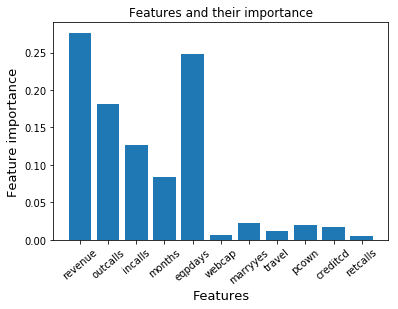

In [54]:
import matplotlib.pyplot as plt
features = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls']
index = np.arange(len(features))
plt.bar(index, dtree.feature_importances_)
plt.xticks(index, features, fontsize=10, rotation=40)
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Feature importance', fontsize = 13)
plt.title('Features and their importance')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [49]:
cell.corr()

,48.82,10,3,26,780,0,0.1,0.2,0.3,1,4,1.1
48.82,1.000000,0.500869,0.391009,-0.015776,-0.221956,0.106616,-0.096710,-0.041866,-0.081808,-0.087453,0.015587,-0.013561
10,0.500869,1.000000,0.732987,-0.040645,-0.243991,0.112340,-0.125852,-0.039033,-0.091920,-0.098280,0.012911,-0.037223
3,0.391009,0.732987,1.000000,-0.026161,-0.204678,0.092949,-0.094650,-0.037149,-0.076529,-0.078709,0.004345,-0.042024
26,-0.015776,-0.040645,-0.026161,1.000000,0.484476,-0.251634,0.083587,0.043678,0.061690,0.139424,0.067705,0.022022
780,-0.221956,-0.243991,-0.204678,0.484476,1.000000,-0.394693,0.113500,0.045895,0.071088,0.123840,-0.026486,0.112698
0,0.106616,0.112340,0.092949,-0.251634,-0.394693,1.000000,-0.059431,-0.006401,-0.029691,-0.064866,-0.007087,-0.067416
0.1,-0.096710,-0.125852,-0.094650,0.083587,0.113500,-0.059431,1.000000,0.150326,0.331497,0.435109,-0.021380,-0.007962
0.2,-0.041866,-0.039033,-0.037149,0.043678,0.045895,-0.006401,0.150326,1.000000,0.254604,0.161631,-0.009111,-0.005913
0.3,-0.081808,-0.091920,-0.076529,0.061690,0.071088,-0.029691,0.331497,0.254604,1.000000,0.292817,-0.017940,-0.004148
1,-0.087453,-0.098280,-0.078709,0.139424,0.123840,-0.064866,0.435109,0.161631,0.292817,1.000000,-0.009476,-0.014516


The above matrix gives a clear picture. As revenue and outcalls are positively corelated and eqpdays is negatively corelated with both of them,increase of both outcalls and revenue alongwith decrease of eqpdays is giving us "No churn" i.e. 0 output. Also,decrease in revenue and outcalls and increase in other is also giving as"No churn" output.By the above observatiobs, churning takes place when either all the 3 increase or all the 3 decrease.

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(train_df,y_train)
train_churndep=dtree.predict(train_df)
test_churndep=dtree.predict(test_df)

accuracy_train_df = sum((y_train-train_churndep)==0)/len(y_train)*100
accuarcy_test_df = sum((y_test-test_churndep)==0)/len(y_test)*100

print(accuracy_train_df)
print(accuarcy_test_df) 

99.98434809829394
53.620624289144445


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [13]:
min_sample_split = []
min_sample_leaf = []
for i in range(0,10):
    sample_split = np.random.randint(250,300)
    min_sample_split.append(sample_split)
    sample_leaf = np.random.randint(2,20)
    min_sample_leaf.append(sample_leaf)
    
print(min_sample_split)
print(min_sample_leaf)

[279, 261, 273, 280, 255, 255, 277, 262, 261, 252]
[14, 16, 19, 11, 18, 10, 12, 17, 10, 12]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

In order to avoid the problem of overfitting or underfitting the data, we tune the paramters. Tuning these parameters help us to find optimal solutions. As a result, I choose the above range to avoid these problems and train an efficient model.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_leaf` as the x-axis and generate a new series (line) for each of `min_samples_split`.

(5 Points)

In [21]:
test_accuracy = []
def accuracy(min_sample_split_list,min_sample_leaf):
    for i in min_sample_split:
        for j in min_sample_leaf:
            dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split = i,min_samples_leaf = j)
            dtree.fit(train_df,y_train)
            predt=dtree.predict(test_df)
            test = (sum((y_test-predt)==0)/len(y_test))
            test_accuracy.append(test)
accuracy(min_sample_split,min_sample_leaf)

print(test_accuracy)

print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy)))

[0.5765196512068748, 0.5785416403386832, 0.5801845065082775, 0.5719701756603058, 0.5800581321875395, 0.5799317578668015, 0.5761405282446607, 0.5784152660179451, 0.5799317578668015, 0.5761405282446607, 0.5796790092253254, 0.582459244281562, 0.5835966131682042, 0.5733602931884241, 0.5839757361304183, 0.5806900037912296, 0.5781625173764691, 0.582332869960824, 0.5806900037912296, 0.5781625173764691, 0.5770251484898269, 0.5798053835460635, 0.5814482497156578, 0.572475672943258, 0.5813218753949198, 0.5795526349045874, 0.5766460255276128, 0.5796790092253254, 0.5795526349045874, 0.5766460255276128, 0.5765196512068748, 0.5785416403386832, 0.5801845065082775, 0.5722229243017819, 0.5800581321875395, 0.5801845065082775, 0.5763932768861367, 0.5784152660179451, 0.5801845065082775, 0.5763932768861367, 0.5787943889801592, 0.5820801213193479, 0.5834702388474662, 0.572728421584734, 0.5838493618096803, 0.5805636294704916, 0.577277897131303, 0.5819537469986099, 0.5805636294704916, 0.577277897131303, 0.578

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

When min_sample_split = 261 and min_sample_leaf = 11 we get the best accuracy i.e. 0.5839757361304183.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

For any business, customers are the important driving factor.Suppose we built a churn model for telecommunication companies. The model will predict the churners by learning the pattern observed in the data. This prediction can help the marketing team devise customer retention policies by obeserving patterns in the data.These policies may include, offering them better deals or mobile plans in order to retain them.The prediction of churners will help in improving their revenue as cost of retaining a customer is lesser than obtaining a new one.

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [3]:
date = pd.read_csv('cases.csv')
date['YEAR'] = pd.to_datetime(date['YEAR'],format='%Y')

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

<Figure size 864x576 with 0 Axes>

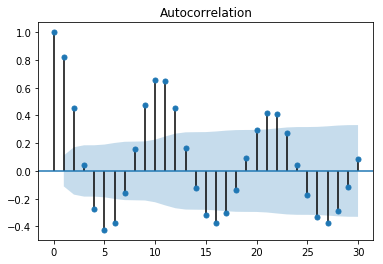

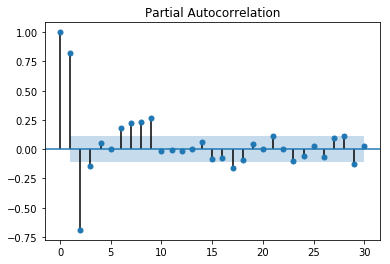

In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(date.YFCASES, lags = 30)
fig = sm.graphics.tsa.plot_pacf(date.YFCASES, lags = 30) 

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


The ACF plot indicates a sin wave and PACF shows spikes at lags 1 and 2 with no correlation for other lags. According to the rules, in this scenario, we use two autoregressive(p) parameters. Here the values of p = (2) and moving average(q) = 0

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [6]:
test_result=sm.stats.durbin_watson(date.YFCASES)
print(test_result)

# The Durbin-Waton statistic of our data is 0.13952892659903304

0.13952892659903304


5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


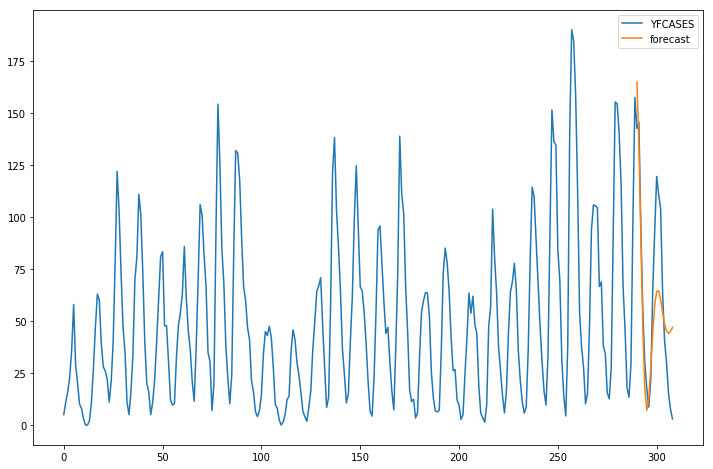

In [18]:
results = sm.tsa.ARMA(date.YFCASES,(2,0)).fit()
date['forecast'] = results.predict(start = 290, end= 308, dynamic= True)  
date[['YFCASES', 'forecast']].plot(figsize=(12, 8))

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=41.73601744891151, pvalue=8.652447297413872e-10)


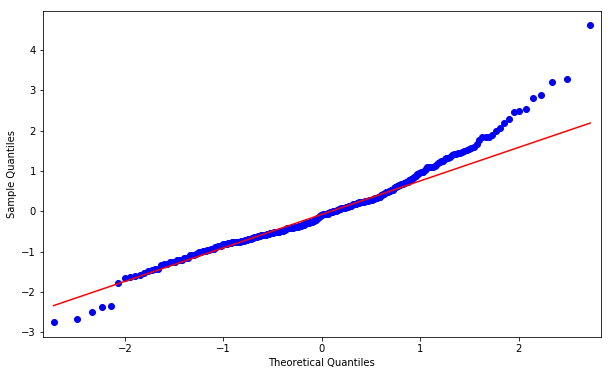

In [47]:
from statsmodels.graphics.api import qqplot
from scipy import stats
residual = results.resid
print(stats.normaltest(residual))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
fig = qqplot(residual, line='q', ax=ax, fit=True)


Here the null hypothesis test is rejected as the pvalue is less than 0.005. The results of the null hypothesis test and qqplot align can be seen from the above plot. The values deviate from the line plotted using normal deviation.

7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


In [12]:
import statsmodels.tsa 
from statsmodels.tsa.stattools import acf  
import statsmodels.tsa.ar_model
from statsmodels.tsa.ar_model import AR
array = statsmodels.tsa.stattools.acf(date.YFCASES,qstat = True)
print(array)

probq = 1.0 - array[2]



(array([ 1.        ,  0.82020129,  0.45126849,  0.03957655, -0.27579196,
       -0.42523943, -0.37659509, -0.15737391,  0.15820254,  0.47309753,
        0.65898002,  0.65029082,  0.45666254,  0.16179329, -0.12205105,
       -0.3161808 , -0.37471125, -0.30605753, -0.1348069 ,  0.09158727,
        0.2975632 ,  0.4207074 ,  0.41183954,  0.27020758,  0.04496208,
       -0.17428715, -0.33045026, -0.37287834, -0.28555061, -0.11794414,
        0.08293231,  0.24897507,  0.32752101,  0.28335919,  0.1375272 ,
       -0.05526386, -0.22973205, -0.31338879, -0.29355684, -0.17897285,
       -0.01769038]), array([ 209.89836354,  273.64400804,  274.1359041 ,  298.10116907,
        355.26381739,  400.24444862,  408.1253776 ,  416.11597506,
        487.81264368,  627.38267263,  763.7523618 ,  831.22896349,
        839.72757927,  844.58023952,  877.25726499,  923.30886471,
        954.13663721,  960.13800293,  962.91765947,  992.36048334,
       1051.41956358, 1108.21233287, 1132.74517578, 1133.42683417,

<p>
<span style="color:blue">
Place your response here
</span>
</p>

8\. Compute prediction for years 2005-2008 and analyze their fit against actual values. (1 point)



,YEAR,YFCASES,forecast
305,2005-01-01,29.8,27.114793
306,2006-01-01,15.2,24.683353
307,2007-01-01,7.5,30.449867
308,2008-01-01,2.9,40.143322


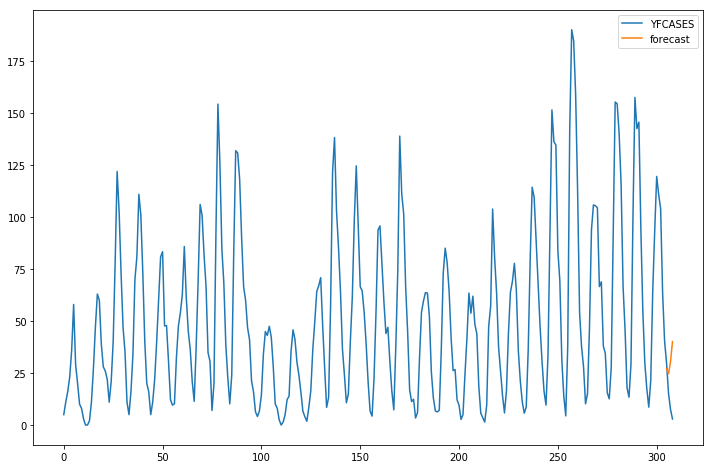

In [16]:
import statsmodels.tsa 
results = sm.tsa.ARMA(date.YFCASES,(2,0)).fit()
date['forecast'] = results.predict(start = 305, end = 309, dynamic = True)  
date[['YFCASES', 'forecast']].plot(figsize=(12, 8))
date.iloc[305:309,:]

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [18]:
y_true = date.iloc[305:309,-2]
y_pred = date.iloc[305:309,-1]

Mean_Absolute_Error = sum(abs(y_true - y_pred))/len(y_true)
Mean_Forecast_Error = sum(y_true - y_pred)/len(y_true)

print(Mean_Absolute_Error)
print(Mean_Forecast_Error)

18.09043701407833
-16.74783360306232
